# 3. Causal Bayesian Networks

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

import daft
from daft import PGM

In [17]:
from pgmpy.models.BayesianNetwork import BayesianNetwork
from pgmpy.inference.CausalInference import CausalInference

In [18]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianNetwork(edges)

    return model

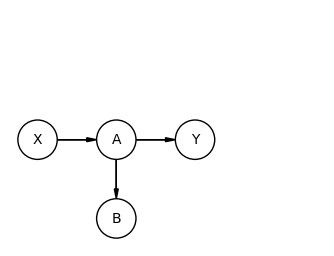

In [19]:
# Game 1 - While this is a "trivial" example, many statisticians would consider including 
# either or both A and B in their models "just for good measure".  Notice though how controlling 
# for A would close off the path of causal information from X to Y, actually *impeding* 
# your effort to measure that effect.

pgm = PGM(shape=[4, 3])

pgm.add_node(daft.Node('X', r"X", 1, 2))
pgm.add_node(daft.Node('Y', r"Y", 3, 2))
pgm.add_node(daft.Node('A', r"A", 2, 2))
pgm.add_node(daft.Node('B', r"B", 2, 1))

pgm.add_edge('X', 'A')
pgm.add_edge('A', 'Y')
pgm.add_edge('A', 'B')

pgm.render()
plt.show()


In [20]:
# Notice how there are no nodes with arrows pointing into X.  Said another way, X has no parents.  
# Therefore, there can't be any backdoor paths confounding X and Y.  pgmpy will confirm this in the following way:

game1 = convert_pgm_to_pgmpy(pgm)
inference1 = CausalInference(game1)

adj_sets = inference1.get_all_backdoor_adjustment_sets("X", "Y")
print(adj_sets)

frozenset()
